# Churn Prediction in Telecom

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The problem statement is to predict customer churn for a telecommunications company using machine learning algorithms. The objective is to identify the key factors that contribute to customer churn and develop a predictive model that can accurately predict whether a customer is likely to churn or not. This will help the company in taking proactive measures to retain customers and reduce churn rate. The dataset contains customer demographic information, account information, and usage data. The goal is to build a model that can effectively use this information to predict customer churn.


### 2) Data Collection
- Dataset Source - Geeklurn

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline




#### Import the CSV Data as Pandas DataFrame

In [2]:
churn = pd.read_csv(r'C:\Users\milan\Documents\Data Science\Geeklurn\Lab_Mr Dhruv\Project\Churn prediction in Telecom using Machine Learning\MLProject-ChurnPrediction\WA_Fn_UseC_Telco-Customer-Churn.csv')

#### Show Top 5 Records

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Shape of the dataset

In [4]:
churn.shape

(7043, 21)

In [5]:
churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Inshight:

- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

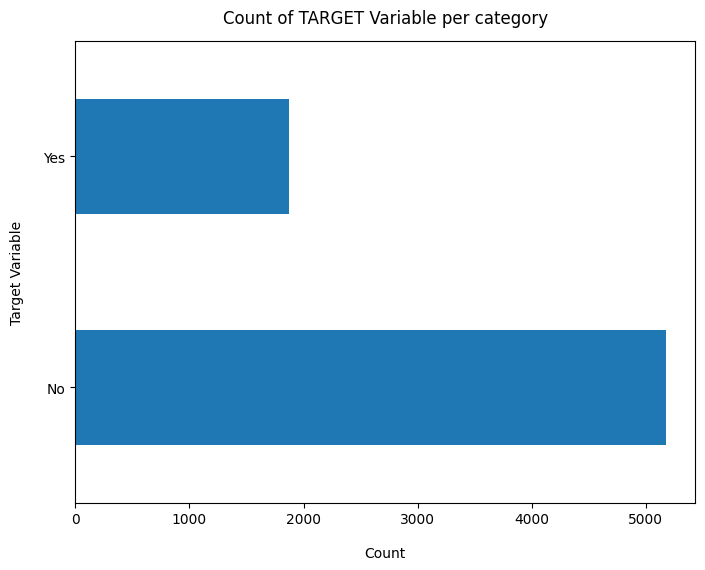

In [8]:
churn['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*churn['Churn'].value_counts()/len(churn['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Inshight:

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
churn.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


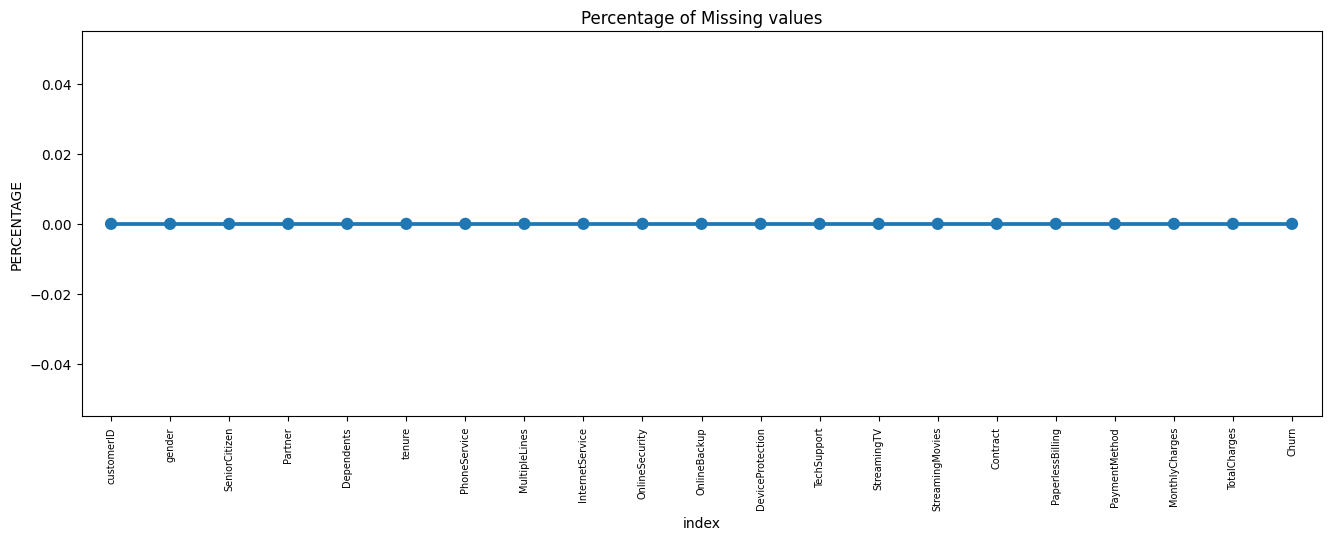

In [12]:
missing = pd.DataFrame((churn.isnull().sum())*100/churn.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
ax.set(title="Percentage of Missing values", ylabel="PERCENTAGE")
plt.show()


In [13]:
missing

,index,0
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [14]:
churn_copy = churn.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [15]:
churn_copy.TotalCharges = pd.to_numeric(churn_copy.TotalCharges, errors='coerce')
churn_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [16]:
churn_copy.loc[churn_copy ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [17]:
#Removing missing values 
churn_copy.dropna(how = 'any', inplace = True)

#churn_copy.fillna(0)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [18]:
# Get the max tenure
print(churn_copy['tenure'].max()) 

72


In [19]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

churn_copy['tenure_group'] = pd.cut(churn_copy.tenure, range(1, 80, 12), right=False, labels=labels)

In [20]:
churn_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**6.** Remove columns not required for processing

In [21]:
#drop column customerID and tenure
churn_copy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
churn_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

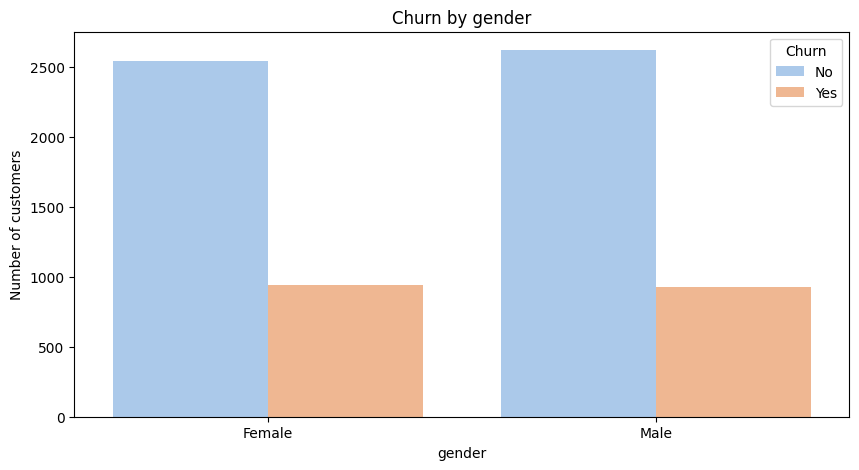

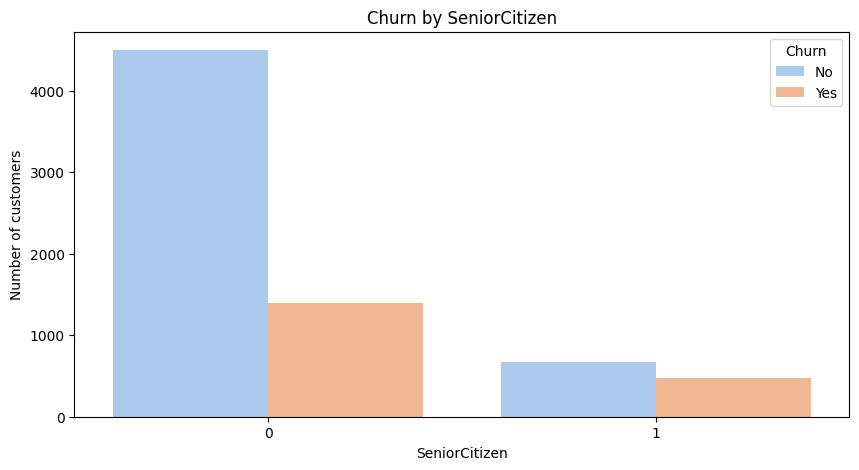

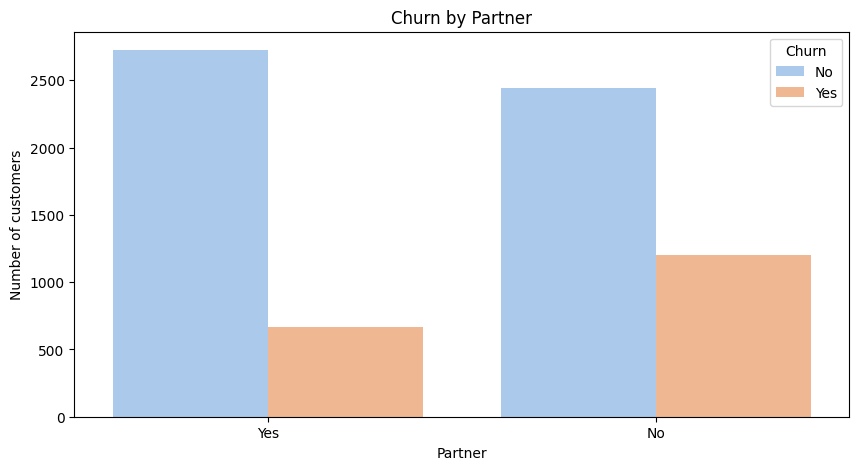

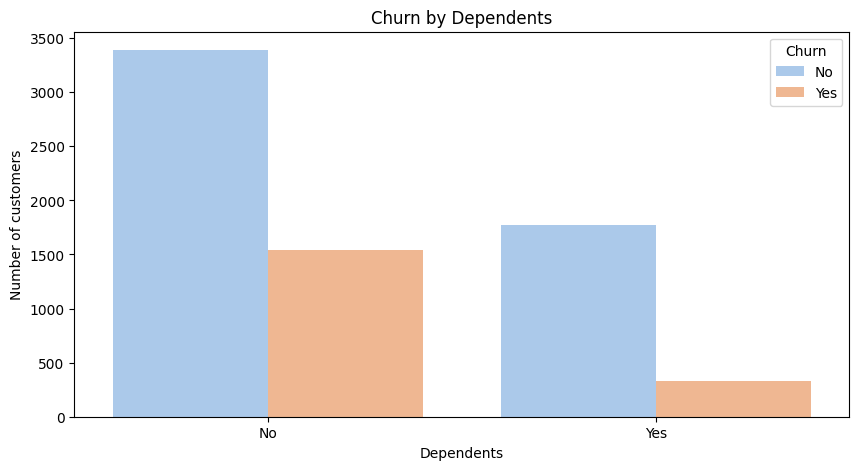

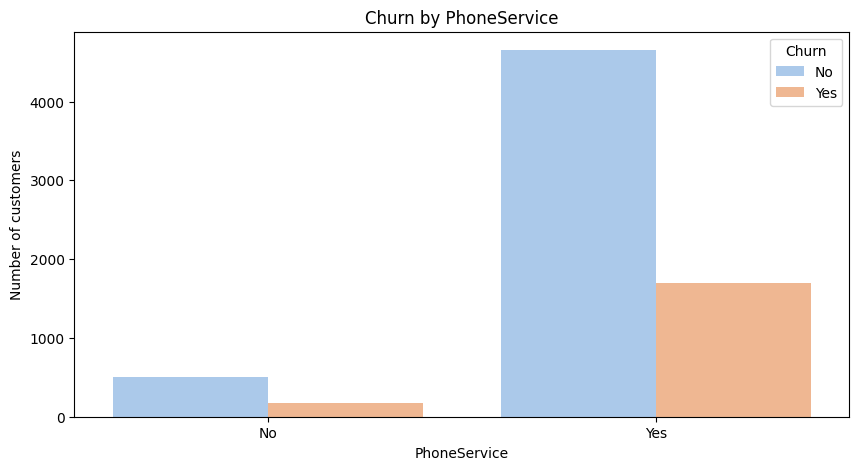

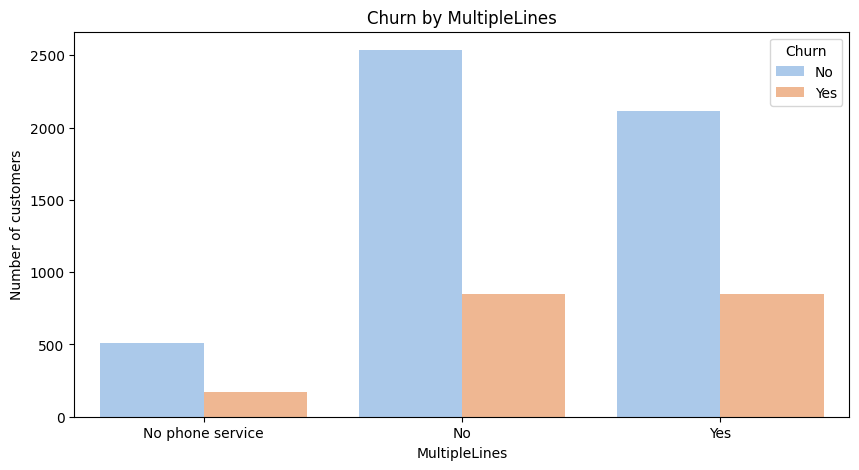

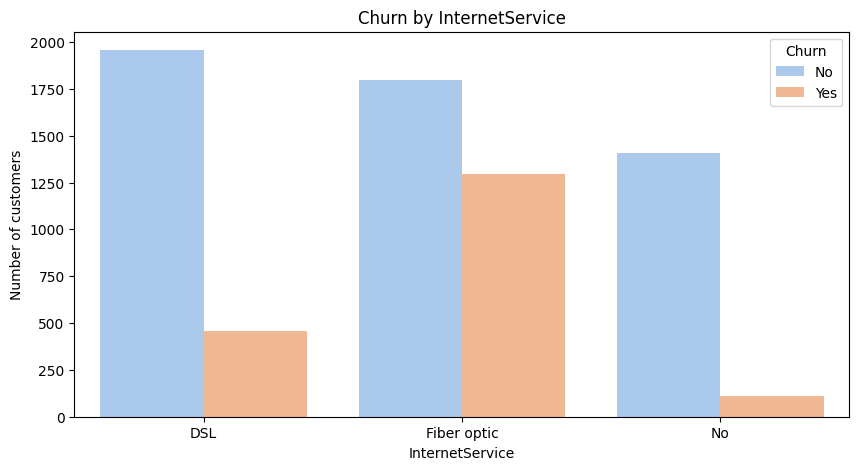

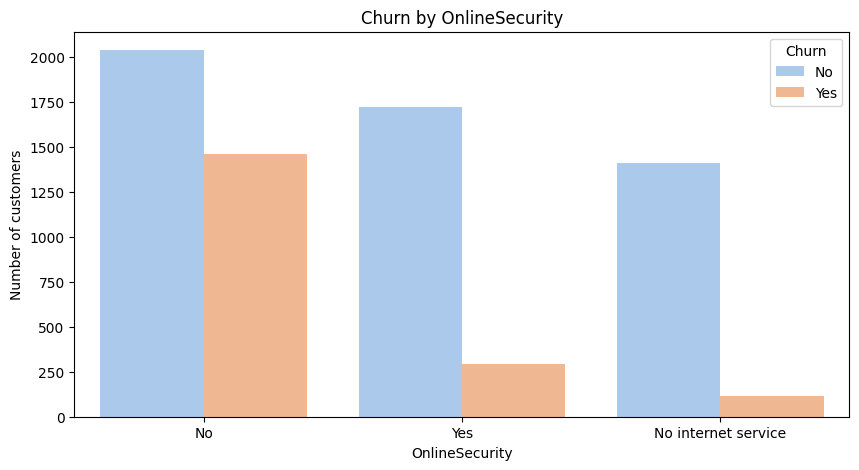

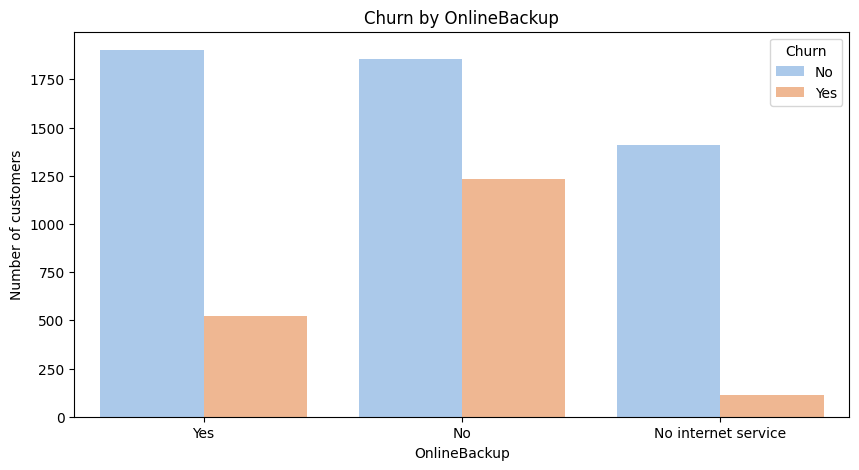

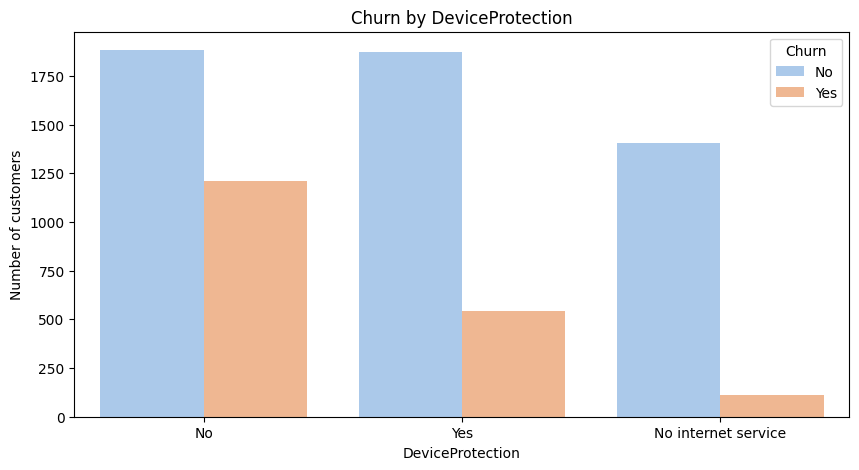

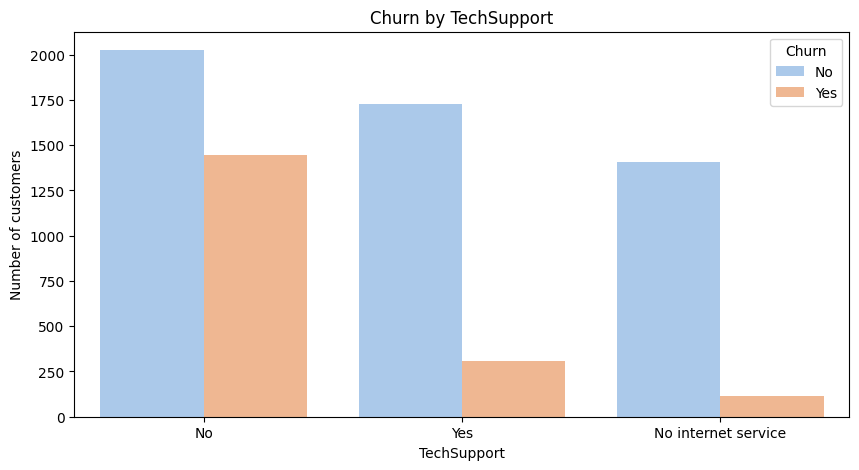

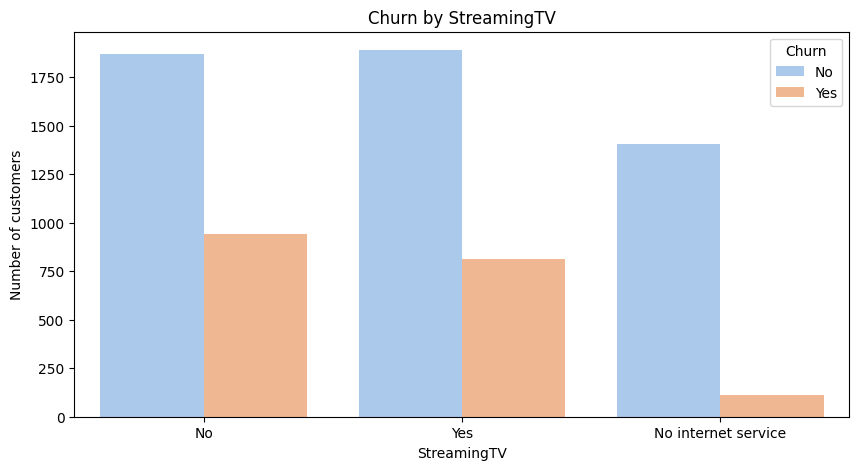

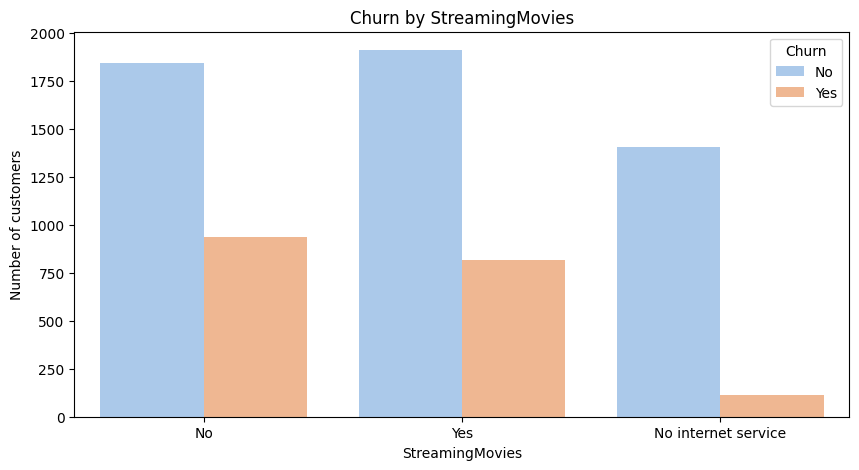

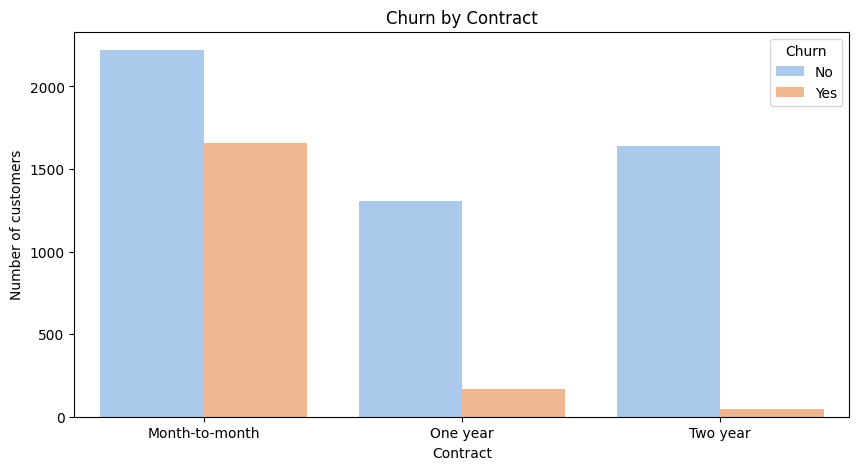

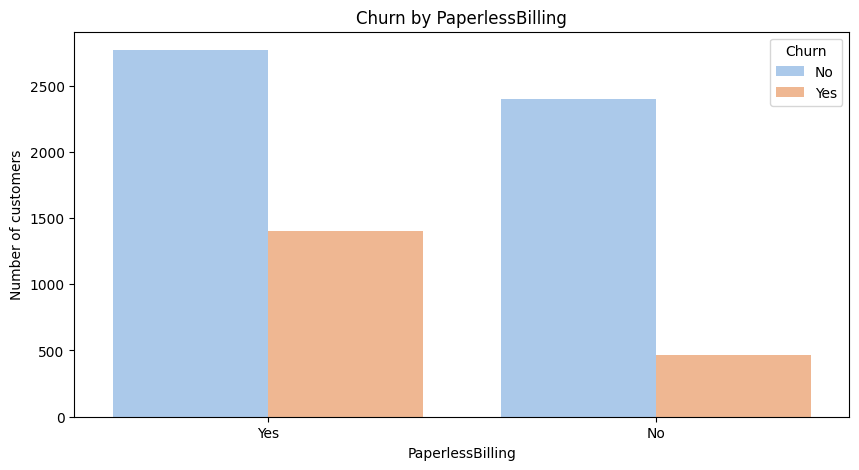

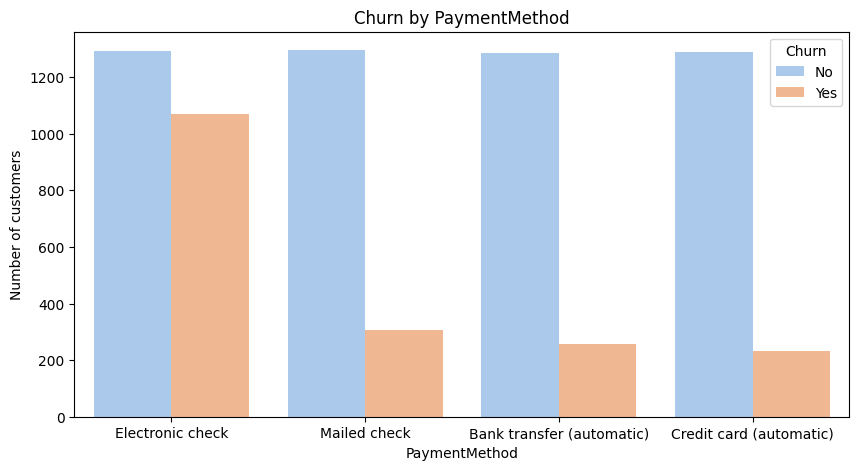

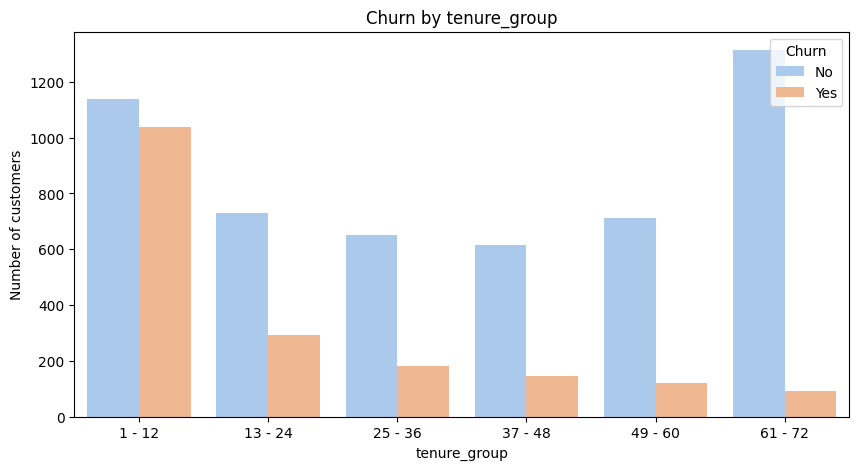

In [22]:
# Visualizing categorical variables against Churn
for i, predictor in enumerate(churn_copy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(figsize=(10,5))
    sns.countplot(data=churn_copy, x=predictor, hue='Churn', palette='pastel')
    plt.title('Churn by {}'.format(predictor))
    plt.xlabel(predictor)
    plt.ylabel('Number of customers')
    plt.legend(title='Churn', loc='upper right')
    plt.show()


**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [23]:
churn_copy['Churn'] = np.where(churn_copy.Churn == 'Yes',1,0)

In [24]:
churn_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [25]:
churn_copy_dummies = pd.get_dummies(churn_copy)
churn_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**9. ** Relationship between Monthly Charges and Total Charges

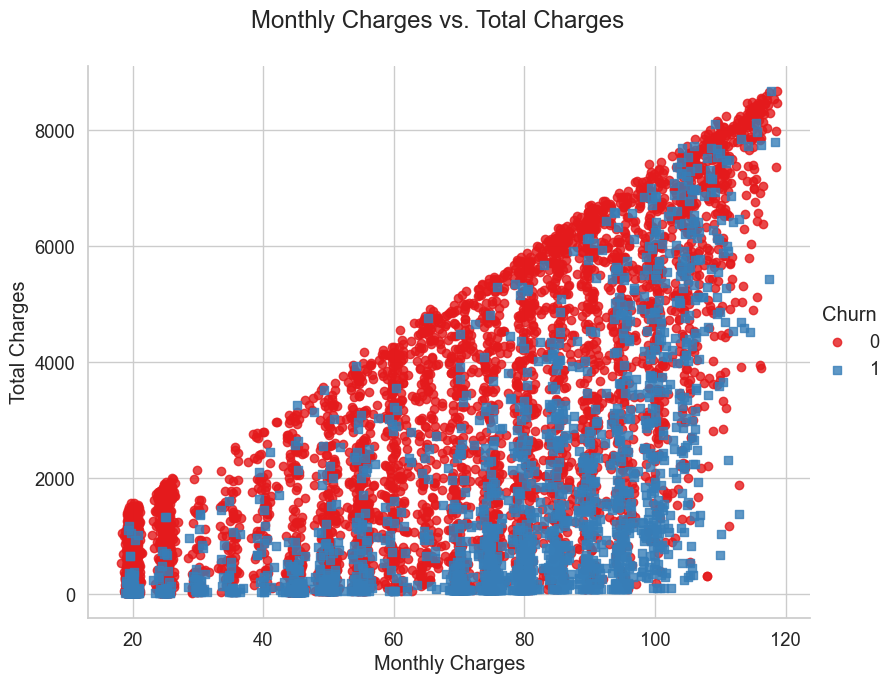

In [26]:
sns.set(style="whitegrid", font_scale=1.2)
g = sns.lmplot(data=churn_copy_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False, height=7, aspect=1.2, hue='Churn', markers=['o', 's'], palette='Set1')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


Total Charges increase as Monthly Charges increase - as expected.

**10. ** Churn by Monthly Charges and Total Charges

C:\Users\milan\AppData\Local\Temp\ipykernel_23320\4130585504.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(churn_copy_dummies.MonthlyCharges[(churn_copy_dummies["Churn"] == 0) ],
C:\Users\milan\AppData\Local\Temp\ipykernel_23320\4130585504.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(churn_copy_dummies.MonthlyCharges[(churn_copy_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly Charges Distribution by Churn')

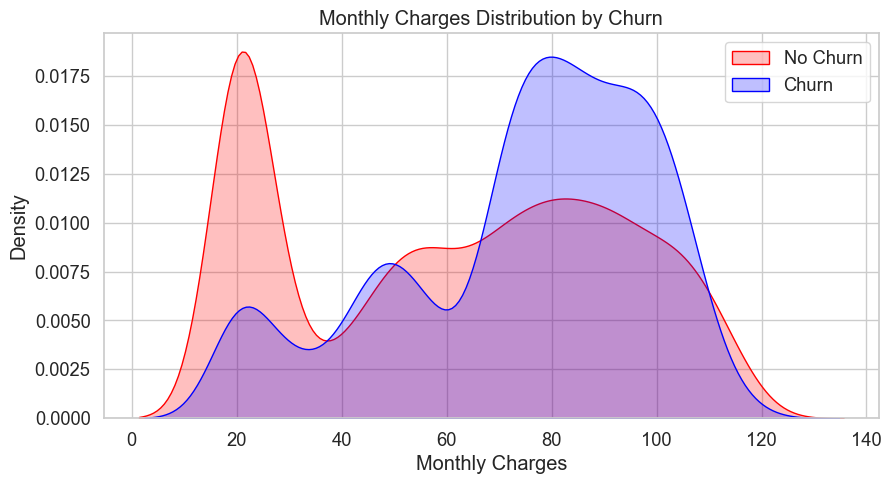

In [27]:
#Plotting the monthly charges by churn using kdeplot
plt.figure(figsize=(10,5))
mth = sns.kdeplot(churn_copy_dummies.MonthlyCharges[(churn_copy_dummies["Churn"] == 0) ],
color="Red", shade = True)
mth = sns.kdeplot(churn_copy_dummies.MonthlyCharges[(churn_copy_dummies["Churn"] == 1) ],
ax = mth, color="Blue", shade= True)

#Set the legend and axis labels
mth.legend(["No Churn","Churn"],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly Charges Distribution by Churn')



#### Insight:
- Churn is high when Monthly Charges ar high

C:\Users\milan\AppData\Local\Temp\ipykernel_23320\2034123692.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_copy_dummies.TotalCharges[(churn_copy_dummies["Churn"] == 0) ],
C:\Users\milan\AppData\Local\Temp\ipykernel_23320\2034123692.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  Tot = sns.kdeplot(churn_copy_dummies.TotalCharges[(churn_copy_dummies["Churn"] == 0) ],
C:\Users\milan\AppData\Local\Temp\ipykernel_23320\2034123692.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_copy_dummies.TotalCharges[(churn_copy_dummies["Churn"] == 1) ],
C:\Users\milan\AppData\Local\Temp\ipykernel_23320\2034123692.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assign

Text(0.5, 1.0, 'Total charges by churn')

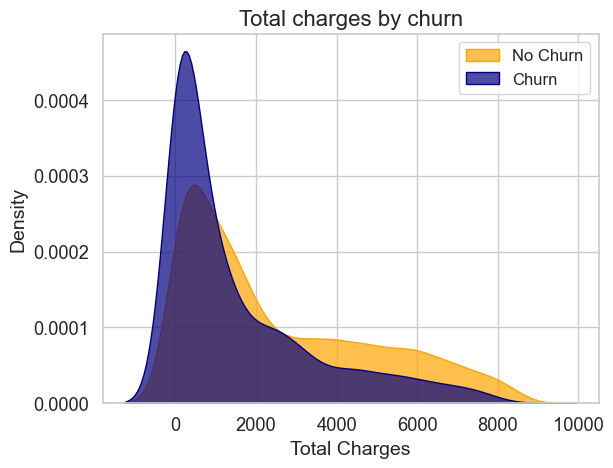

In [28]:
sns.set_style("whitegrid")
Tot = sns.kdeplot(churn_copy_dummies.TotalCharges[(churn_copy_dummies["Churn"] == 0) ],
                color="orange", shade = True, label="No Churn", alpha=.7, palette="husl")
Tot = sns.kdeplot(churn_copy_dummies.TotalCharges[(churn_copy_dummies["Churn"] == 1) ],
                ax =Tot, color="navy", shade= True, label="Churn", alpha=.7, palette="husl")
Tot.legend(loc='upper right', fontsize=12)
Tot.set_ylabel('Density', fontsize=14)
Tot.set_xlabel('Total Charges', fontsize=14)
Tot.set_title('Total charges by churn', fontsize=16)


#### Surprising insight 
- as higher Churn at lower Total Charges

-  However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

#### 11. Build a corelation of all predictors with 'Churn'

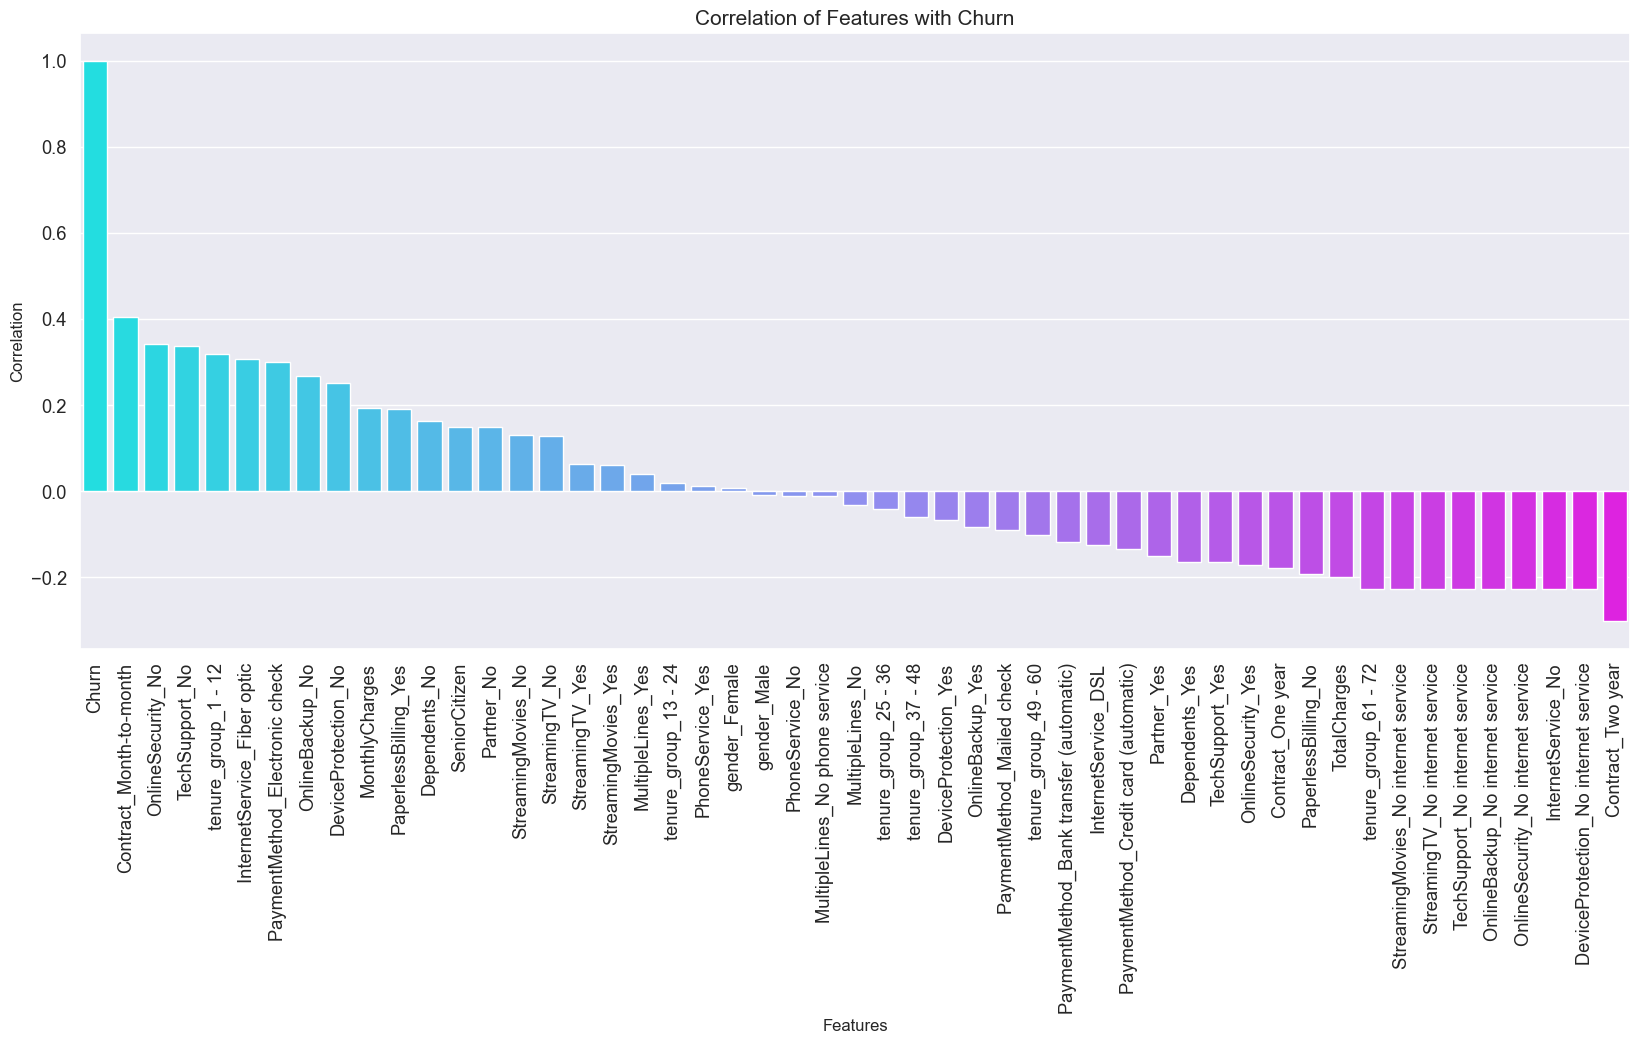

In [29]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x=churn_copy_dummies.corr()['Churn'].sort_values(ascending=False).index, y=churn_copy_dummies.corr()['Churn'].sort_values(ascending=False).values, palette='cool')
plt.xticks(rotation=90)
plt.title('Correlation of Features with Churn', fontsize=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.show()


#### Derived Insight: 

-  **HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

-  **LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

-  Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

-  This is also evident from the **Heatmap** below

<Axes: >

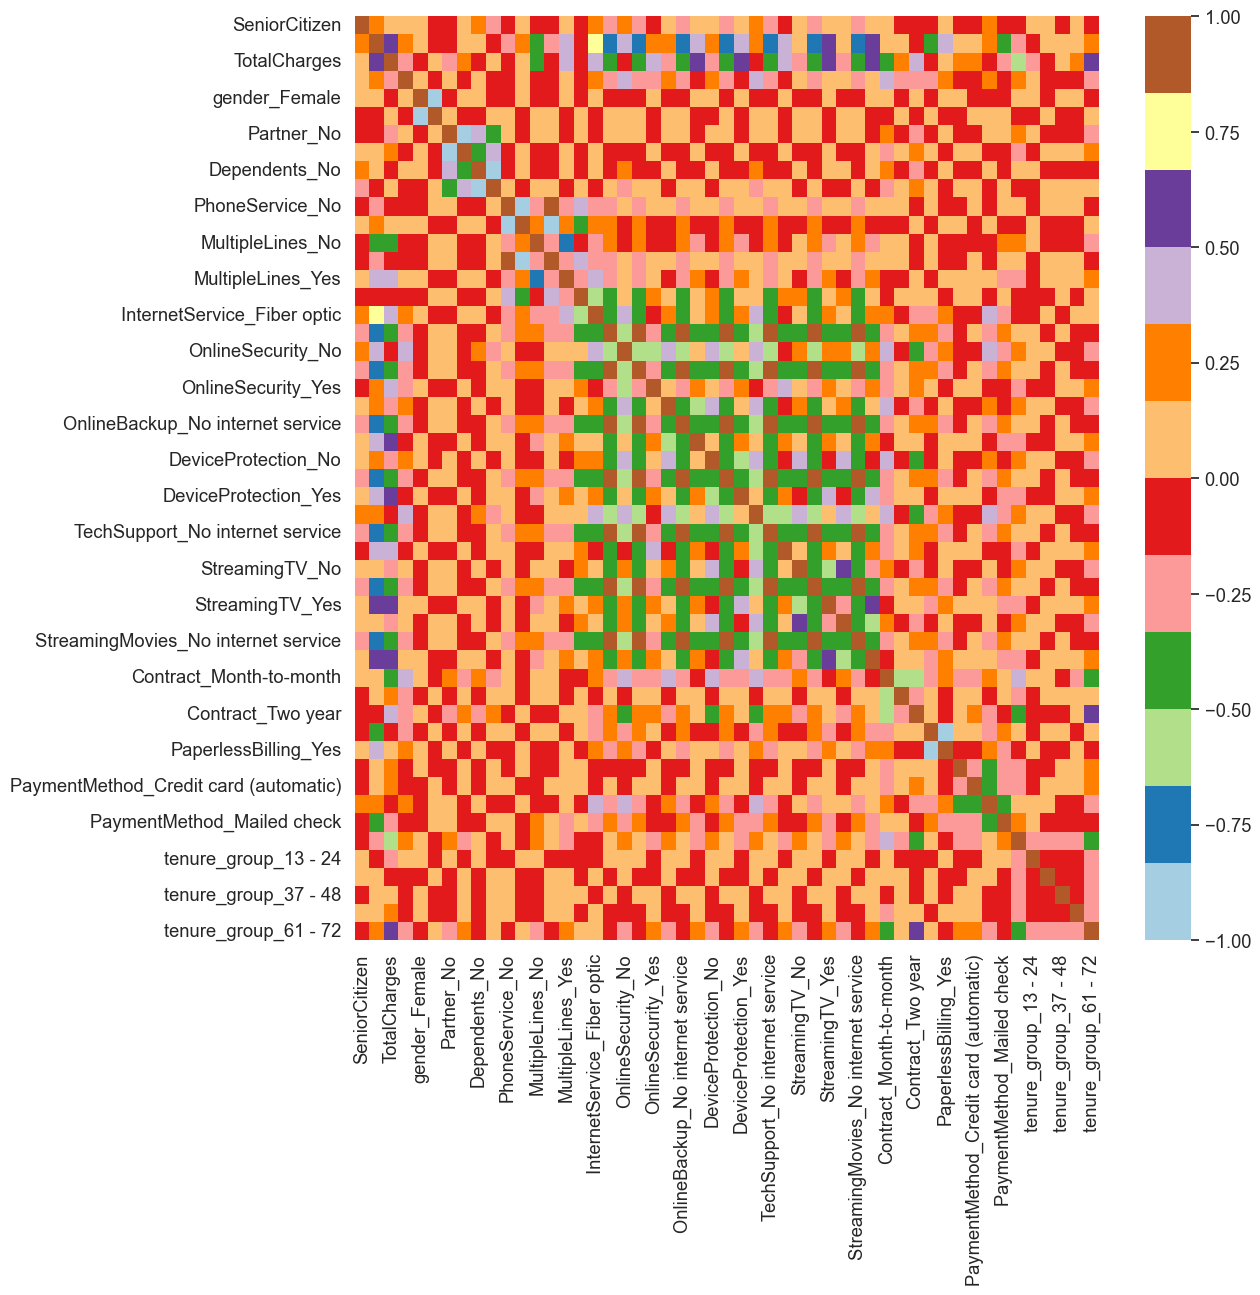

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_copy_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [31]:
# Split data based on target variable
new_df1_target0 = churn_copy.loc[churn_copy["Churn"] == 0]
new_df1_target1 = churn_copy.loc[churn_copy["Churn"] == 1]

In [32]:
# Define function to create countplot
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='husl') 
        
    plt.show()



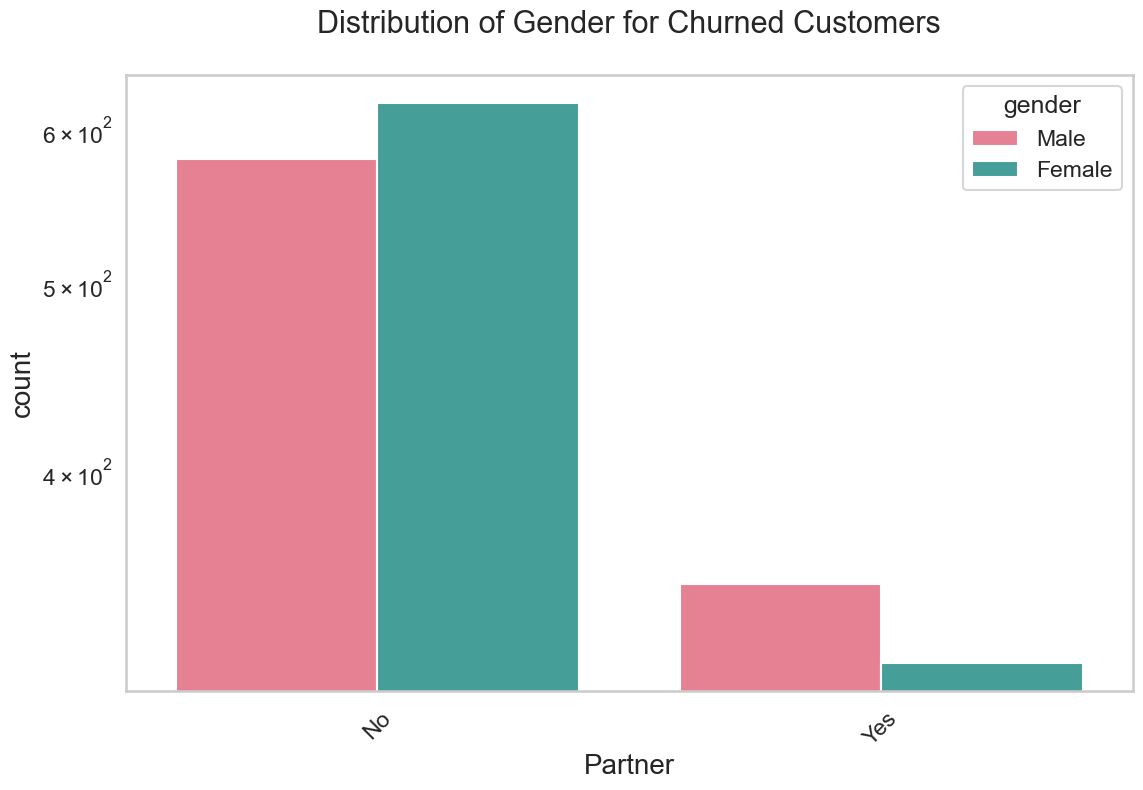

In [33]:
# Create countplot for distribution of gender for churned customers
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')



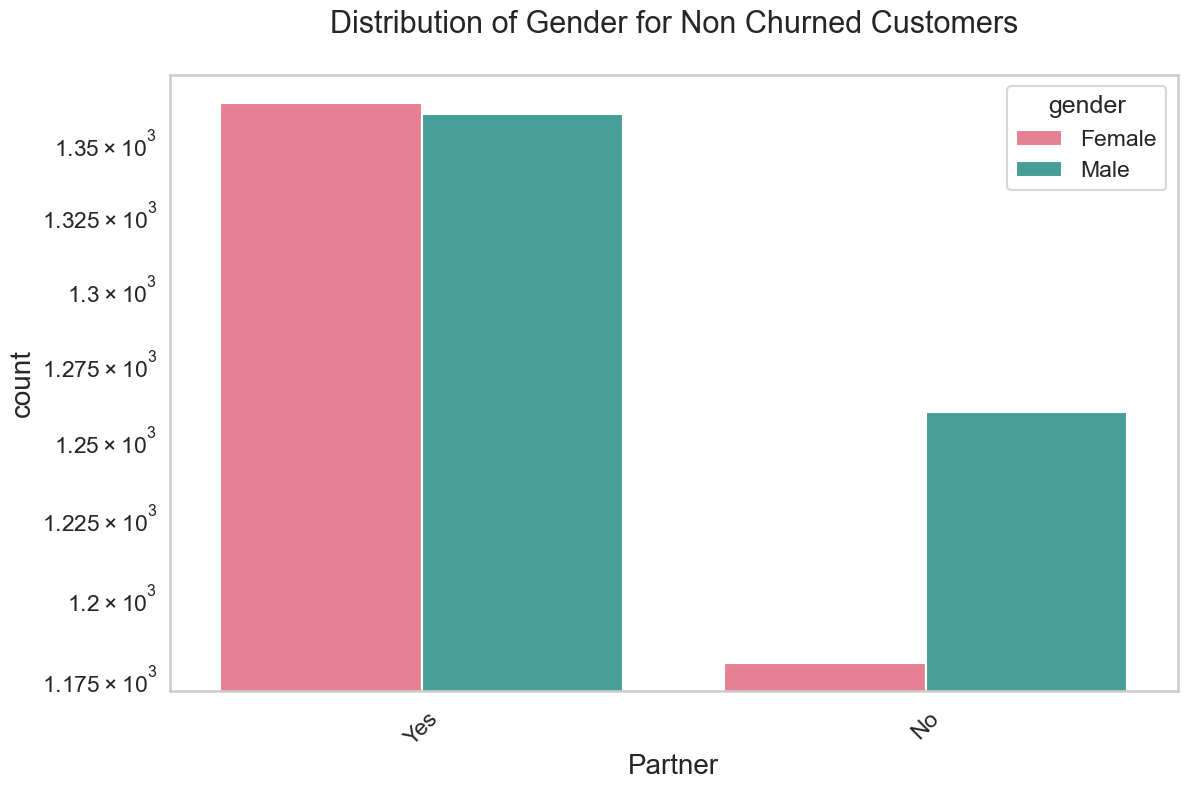

In [34]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

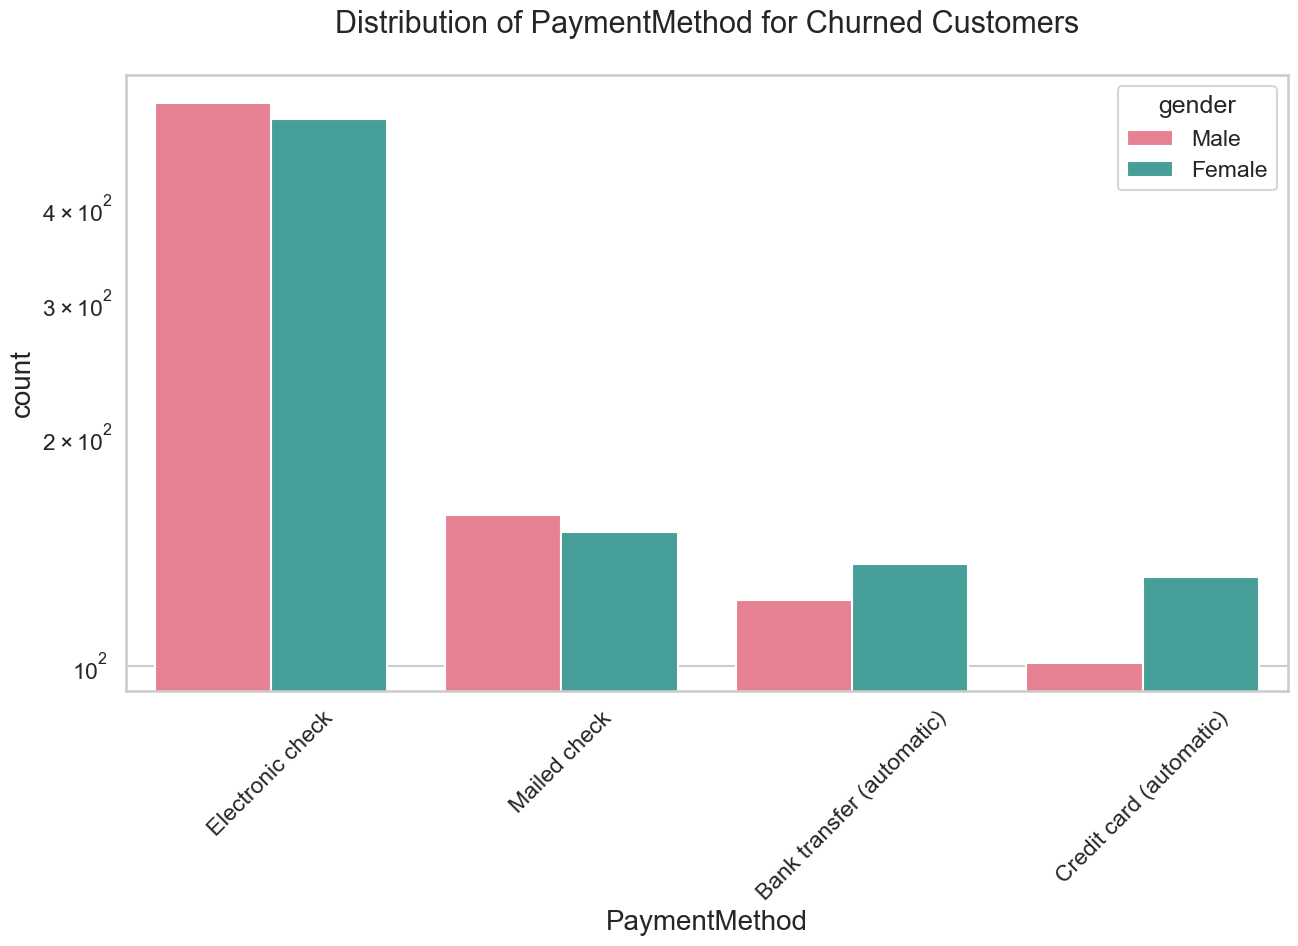

In [35]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

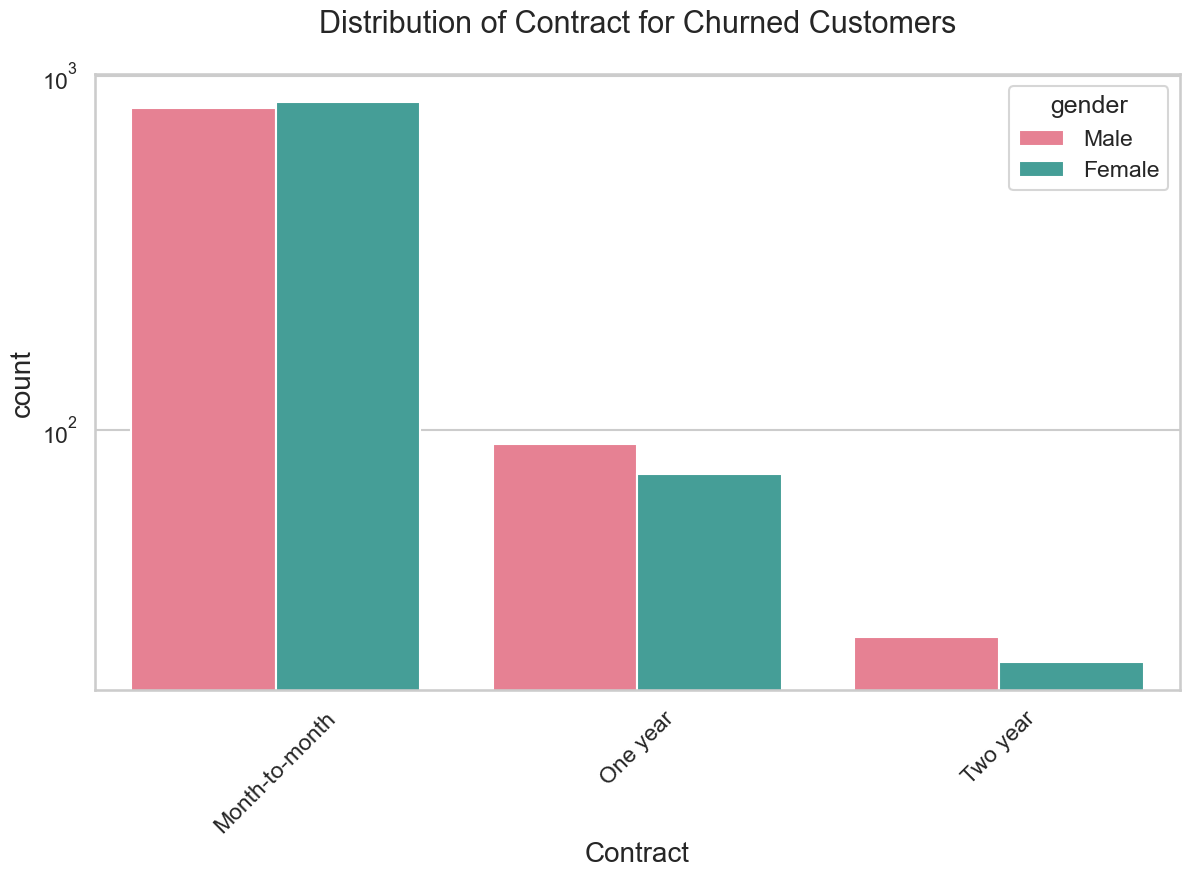

In [36]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

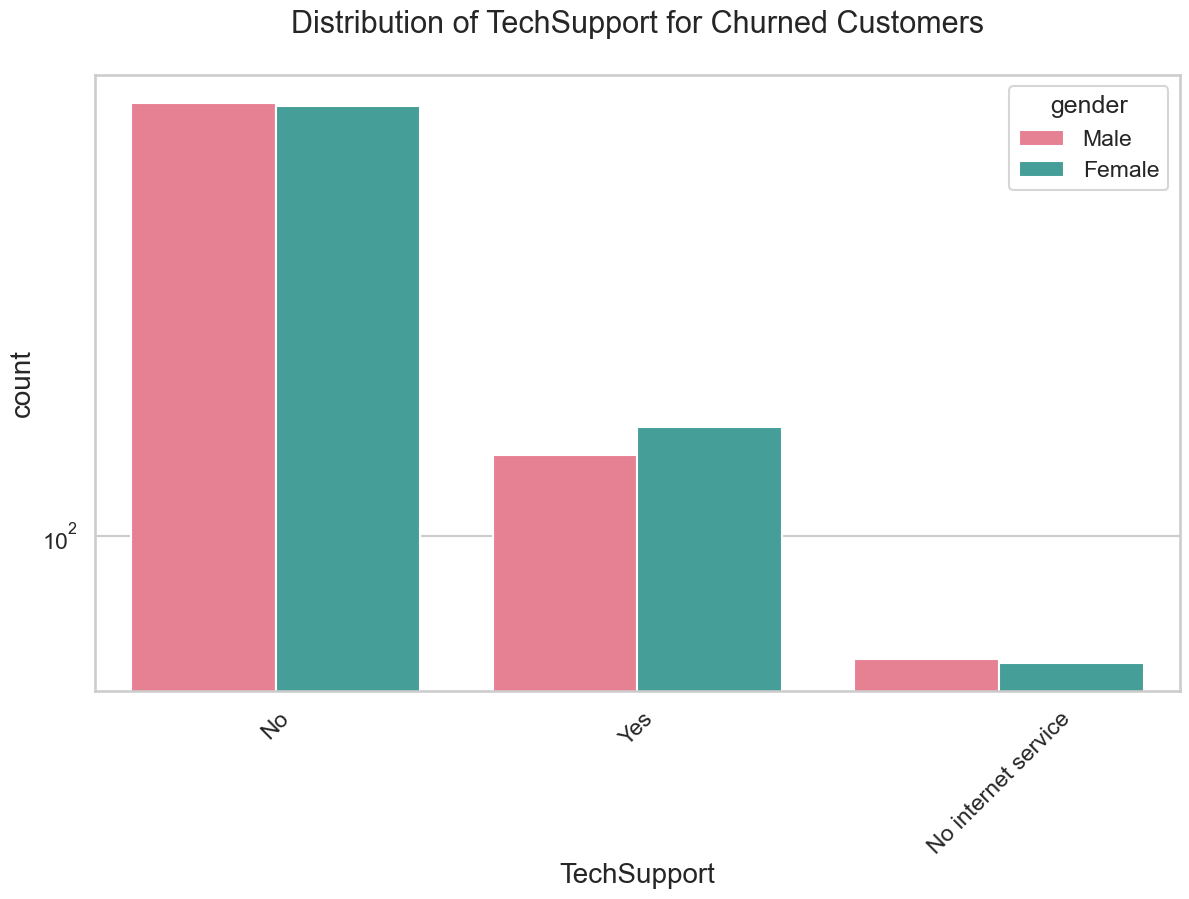

In [37]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

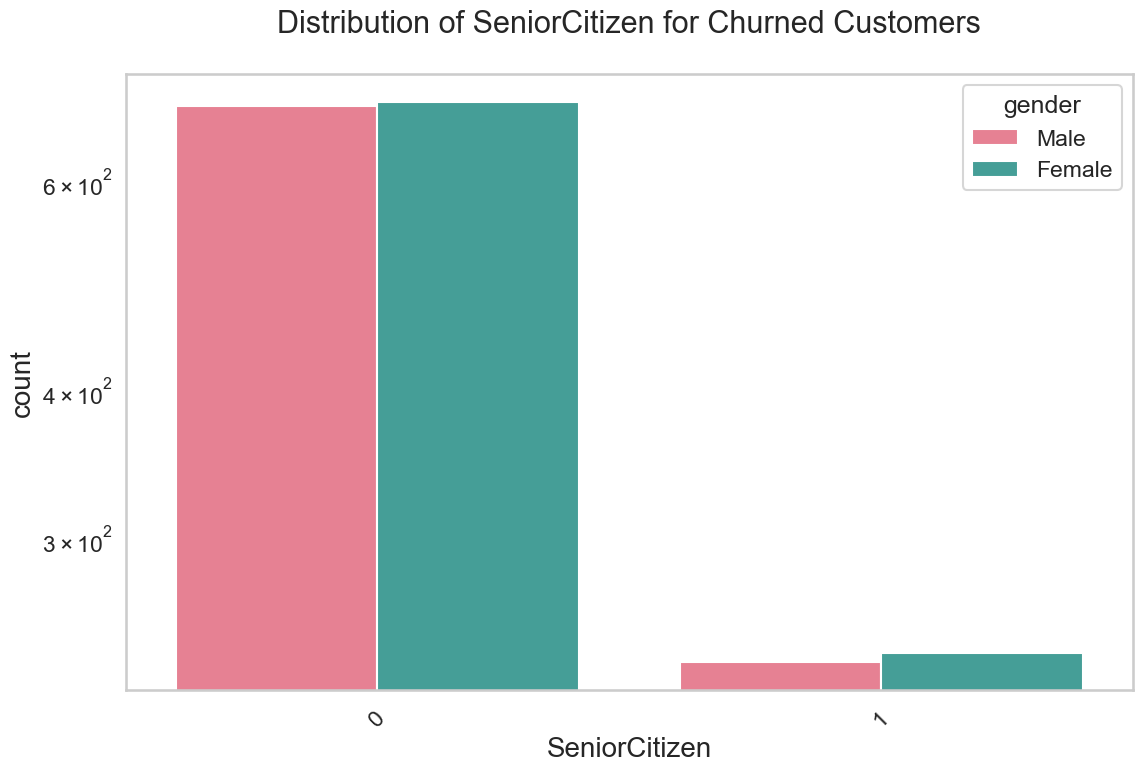

In [38]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

#### These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

In [39]:
churn_copy_dummies.to_csv(r'C:\Users\milan\Documents\Data Science\Geeklurn\Lab_Mr Dhruv\Project\Churn prediction in Telecom using Machine Learning\MLProject-ChurnPrediction\tel_churn.csv')